In [ ]:
!pip install tsai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 272 kB 4.8 MB/s 
     |████████████████████████████████| 2.5 MB 51.7 MB/s 


In [ ]:
from tsai.all import *

In [ ]:
my_setup()

os              : Linux-5.10.133+-x86_64-with-glibc2.27
python          : 3.8.15
tsai            : 0.3.4
fastai          : 2.7.10
fastcore        : 1.5.27
torch           : 1.12.1+cu113
device          : cpu
cpu cores       : 1
threads per cpu : 2
RAM             : 12.68 GB
GPU memory      : N/A


# Data Preprocessing

## Import and Concat Patients

In [ ]:
columns = ['timestamp', 'LTA', 'RTA', 'IO', 'ECG', 'RGS', 'accel_x1', 'accel_y1', 'accel_z1', 'gyro_x1', 'gyro_y1', 'gyro_z1', 'NC1', 'accel_x2', 'accel_y2', 'accel_z2', 'gyro_x2', 'gyro_y2', 'gyro_z2', 'NC2', 'accel_x3', 'accel_y3', 'accel_z3', 'gyro_x3', 'gyro_y3', 'gyro_z3', 'NC3', 'accel_x4', 'accel_y4', 'accel_z4', 'gyro_x4', 'gyro_y4', 'gyro_z4', 'SC', 'label']

X_raw=[]
Y_raw=[]
row_count=0
for i in range(1,13):
  if i <= 9:
    task = pd.read_csv(f'/content/00{i}_task_1.txt', delimiter=',', names=columns).drop(columns=['timestamp'])
  else:
    task = pd.read_csv(f'/content/0{i}_task_1.txt', delimiter=',', names=columns).drop(columns=['timestamp'])
  row_count+=task.shape[0]
  print(row_count)
  if i == 1:
    Y_raw=task.pop('label').to_numpy()
    X_raw=task.to_numpy()
  else:
    Y_raw=np.concatenate((Y_raw,task.pop('label').to_numpy()))
    X_raw=np.concatenate((X_raw,task.to_numpy()))
print(X_raw.shape)
print(Y_raw.shape)

180501
302002
945503
1039504
1161505
1388506
1537007
1755508
1854509
2256510
2551011
2810512
(2810512, 33)
(2810512,)


In [ ]:
np.mean(Y_raw)

0.45169705733332577

## Batch Data

In [ ]:
BATCH_SIZE=1000
n_batches=len(X_raw)//BATCH_SIZE
# remove remainder rows
X_no_remain=X_raw[:n_batches*BATCH_SIZE,]
Y_no_remain=Y_raw[:n_batches*BATCH_SIZE]

X_batch = np.split(X_no_remain, n_batches)
Y_batch = np.split(Y_no_remain, n_batches)

In [ ]:
# n_samples=BATCH_SIZE
# n_features=X.shape[1]
# n_steps=n_batches

# X=np.reshape(X_batch, (n_samples, n_features, n_steps))
# X.shape

(1000, 33, 2810)

In [ ]:
n_samples=n_batches
n_features=X_raw.shape[1]
n_steps=BATCH_SIZE

X=np.reshape(X_batch, (n_samples, n_features, n_steps))
X.shape

(2810, 33, 1000)

In [ ]:
THRESHOLD=0.5
Y=[]
for i,batch in enumerate(Y_batch):
  batch_mean=np.mean(batch)
  if batch_mean > THRESHOLD:
    Y.append(1)
  else:
    Y.append(0)
Y=np.array(Y)
Y.shape

(2810,)

In [ ]:
Y_batch[93]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Begin TSAI Setup and Training

In [ ]:
tfms = [None, [Categorize()]]
dsets = TSDatasets(X, Y, tfms=tfms, inplace=True)

In [ ]:
dsets.valid

In [ ]:
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=64, batch_tfms=[TSStandardize()], num_workers=0)

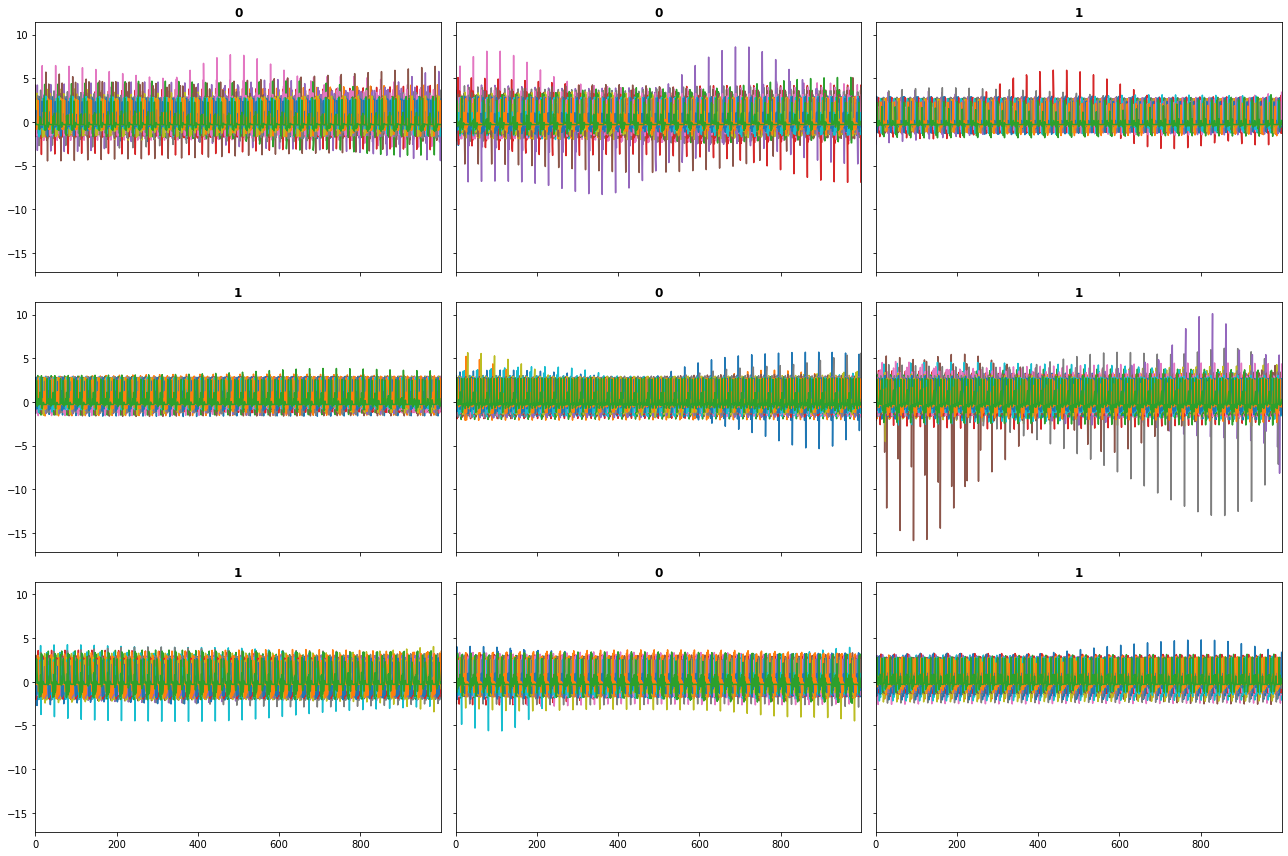

In [ ]:
dls.show_batch(sharey=True)

In [ ]:
# # Build Learner
# c_in=n_features
# c_out=1
# model = LSTM(dls.vars, dls.c)
# model = LSTM (c_in, c_out, hidden_size=100, n_layers=1, bias=True, rnn_dropout=0,
#        bidirectional=False, fc_dropout=0.0)
model = InceptionTime(dls.vars, dls.c)
learn = Learner(dls, model, metrics=accuracy)
learn.save('stage0')

Path('models/stage0.pth')

In [ ]:
learn.load('stage0')
learn.lr_find()

ZeroDivisionError: ignored

In [ ]:
learn.fit_one_cycle(1, lr_max=1e-3)
learn.save('stage1')

epoch,train_loss,valid_loss,accuracy,time


ZeroDivisionError: ignored

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
learn.save_all(path='export', dls_fname='dls', model_fname='model', learner_fname='learner')

In [ ]:
batch_tfms = TSStandardize(by_sample=True)
mv_clf = TSClassifier(X, Y, path='models', arch=LSTM, batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
mv_clf.fit_one_cycle(10, 1e-2)
mv_clf.export("mv_clf.pkl")

## Import Data

In [ ]:
columns = ['timestamp', 'LTA', 'RTA', 'IO', 'ECG', 'RGS', 'accel_x1', 'accel_y1', 'accel_z1', 'gyro_x1', 'gyro_y1', 'gyro_z1', 'NC1', 'accel_x2', 'accel_y2', 'accel_z2', 'gyro_x2', 'gyro_y2', 'gyro_z2', 'NC2', 'accel_x3', 'accel_y3', 'accel_z3', 'gyro_x3', 'gyro_y3', 'gyro_z3', 'NC3', 'accel_x4', 'accel_y4', 'accel_z4', 'gyro_x4', 'gyro_y4', 'gyro_z4', 'SC', 'label']

task1=pd.read_csv('/content/001_task_1.txt', delimiter=',', names=columns).drop(columns=['timestamp']).head(94000)
Y1=task1.pop('label').to_numpy()
X1=task1.to_numpy()

task2=pd.read_csv('/content/002_task_1.txt', delimiter=',', names=columns).drop(columns=['timestamp']).head(94000)
Y2=task2.pop('label').to_numpy()
X2=task2.to_numpy()

task3=pd.read_csv('/content/003_task_1.txt', delimiter=',', names=columns).drop(columns=['timestamp']).head(94000)
Y3=task3.pop('label').to_numpy()
X3=task3.to_numpy()

task4=pd.read_csv('/content/004_task_1.txt', delimiter=',', names=columns).drop(columns=['timestamp']).head(94000)
Y4=task4.pop('label').to_numpy()
X4=task4.to_numpy()

task5=pd.read_csv('/content/005_task_1.txt', delimiter=',', names=columns).drop(columns=['timestamp']).head(94000)
Y5=task5.pop('label').to_numpy()
X5=task5.to_numpy()

task6=pd.read_csv('/content/006_task_1.txt', delimiter=',', names=columns).drop(columns=['timestamp']).head(94000)
Y6=task6.pop('label').to_numpy()
X6=task6.to_numpy()

In [ ]:
task7=pd.read_csv('/content/007_task_1.txt', delimiter=',', names=columns).drop(columns=['timestamp']).head(94000)
Y7=task7.pop('label').to_numpy()
X7=task7.to_numpy()

task8=pd.read_csv('/content/008_task_1.txt', delimiter=',', names=columns).drop(columns=['timestamp']).head(94000)
Y8=task8.pop('label').to_numpy()
X8=task8.to_numpy()

task9=pd.read_csv('/content/009_task_1.txt', delimiter=',', names=columns).drop(columns=['timestamp']).head(94000)
Y9=task9.pop('label').to_numpy()
X9=task9.to_numpy()

task10=pd.read_csv('/content/010_task_1.txt', delimiter=',', names=columns).drop(columns=['timestamp']).head(94000)
Y10=task10.pop('label').to_numpy()
X10=task10.to_numpy()

task11=pd.read_csv('/content/011_task_1.txt', delimiter=',', names=columns).drop(columns=['timestamp']).head(94000)
Y11=task11.pop('label').to_numpy()
X11=task11.to_numpy()

task12=pd.read_csv('/content/012_task_1.txt', delimiter=',', names=columns).drop(columns=['timestamp']).head(94000)
Y12=task12.pop('label').to_numpy()
X12=task12.to_numpy()




In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
task1

,LTA,RTA,IO,ECG,RGS,accel_x1,accel_y1,accel_z1,gyro_x1,gyro_y1,...,gyro_y3,gyro_z3,NC3,accel_x4,accel_y4,accel_z4,gyro_x4,gyro_y4,gyro_z4,SC
0,15.5,-855.0,-11.0,-369.0,-313.0,8019.000000,-2540.000000,-1292.000000,-229.000000,-113.000000,...,495.000000,115.000000,53.000000,7865.000000,4712.000000,-1087.000000,661.000000,-688.000000,509.000000,1830.000000
1,23.0,-918.0,-10.5,-356.5,-200.0,8012.323784,-2550.228411,-1293.335240,-225.946476,-101.696846,...,508.314363,117.611651,53.000000,8055.034673,4661.843221,-1105.551850,657.591356,-723.735803,533.373304,1830.000025
2,74.0,-891.5,-10.5,-269.5,-7.5,8013.199022,-2567.976963,-1310.214708,-223.981682,-93.752486,...,524.387975,119.670776,53.000000,8224.983668,4607.356201,-1114.157508,662.330623,-762.931999,563.748359,1830.000019
3,247.0,-731.0,-10.5,-242.0,301.0,8021.112370,-2589.211311,-1336.726557,-222.443651,-88.059704,...,541.404406,121.524075,53.000000,8379.215326,4552.647571,-1094.587242,672.874212,-801.660294,595.436762,1830.000000
4,378.0,-607.5,-10.5,-245.5,562.0,8035.550478,-2609.897105,-1366.958937,-220.670413,-83.511281,...,557.547225,123.518249,53.000000,8522.097990,4501.825960,-1028.611317,686.878534,-835.992392,623.750109,1829.999987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93995,-616.0,-3627.0,42.0,-1942.0,-1542.5,21768.000000,-13172.000000,785.000000,1351.000000,-244.000000,...,-39.000000,-89.000000,53.000000,6932.000000,3267.000000,-115.000000,-675.000000,-449.000000,-102.000000,1797.000000
93996,-556.5,-3827.0,42.5,-1917.5,-1064.5,17877.115648,-4999.729778,2970.581609,1916.073639,381.544395,...,-26.516341,-89.888746,53.007923,7125.886538,3293.444316,-151.021189,-699.388986,-448.801880,-94.403886,1797.000004
93997,-373.5,-4069.0,42.5,-1899.5,-604.5,13292.501889,3892.670764,5312.015376,2500.796678,1154.399743,...,-15.168373,-91.182585,53.009846,7292.939272,3312.730359,-183.552277,-716.703834,-447.897024,-85.961492,1797.000009
93998,-262.0,-4118.5,43.0,-1896.5,-281.5,8690.530306,12348.336195,7458.358338,3000.182898,1897.882893,...,-4.262234,-95.732050,53.007807,7441.248736,3326.894245,-213.672770,-728.424190,-446.191228,-76.917156,1797.000011


In [ ]:
changes=np.where(Y1[:-1] != Y1[1:])[0]
changes

array([13999, 31499, 32999, 34499, 44499, 50999, 59499, 75499, 88999,
       93499])

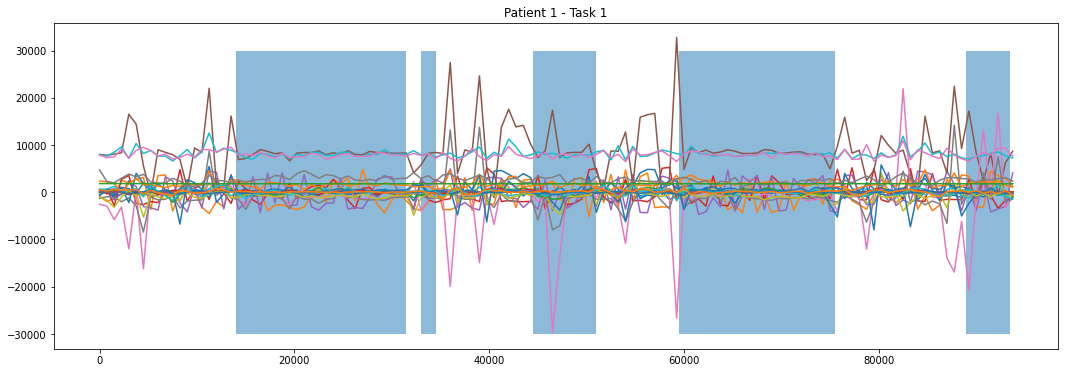

In [ ]:
# plt.figure(figsize=(18, 6))
fig, ax = plt.subplots(figsize=(18, 6))
ax.set_title('Patient 1 - Task 1')

step=750
columns = ['LTA', 'RTA', 'IO', 'ECG', 'RGS', 'accel_x1', 'accel_y1', 'accel_z1', 'gyro_x1', 'gyro_y1', 'gyro_z1', 'NC1', 'accel_x2', 'accel_y2', 'accel_z2', 'gyro_x2', 'gyro_y2', 'gyro_z2', 'NC2', 'accel_x3', 'accel_y3', 'accel_z3', 'gyro_x3', 'gyro_y3', 'gyro_z3', 'NC3', 'accel_x4', 'accel_y4', 'accel_z4', 'gyro_x4', 'gyro_y4', 'gyro_z4', 'SC']
for col in columns:
  ax.plot(task1[col][::step])
for i,loc in enumerate(changes):
  if (i % 2) == 0:
    rect=patches.Rectangle((loc,-30000),changes[i+1]-loc,60000,alpha=0.5)
    ax.add_patch(rect)


In [ ]:
FX=np.array([X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12])
y=np.array([Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12])

In [ ]:
X=np.array([X1,X2,X3,X4,X5,X6])
y=np.array([Y1,Y2,Y3,Y4,Y5,Y6])

In [ ]:
X.shape, y.shape

((6, 94000, 33), (6, 94000))

In [ ]:
# X = X[:, 0]
# y = y.reshape(-1, 1)
# data = np.concatenate((X, y), axis=-1)
# df = pd.DataFrame(data)
# df.head()

In [ ]:
# X, y = df2xy(df, target_col='target')
# test_eq(X.shape, (60, 1, 570))
# test_eq(y.shape, (60, ))

In [ ]:
# splits = get_splits(y, valid_size=.2, stratify=True, random_state=23, shuffle=True)
# splits

In [ ]:
# X, y = df2xy(df, target_col='target')
# print(X.shape)
# test_eq(X.shape, (60, 1, 570))
# test_eq(y.shape, (60, ))



In [ ]:
# X_memmap=np.memmap(self._prepared_data_location_npmemmap_X,dtype='float32',mode='w+')
# X_list_total_standardized_memmap[:]=X_list_total_standardized[:]



##Train

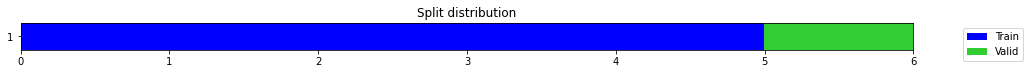

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: ignored

In [ ]:
# X, y, splits = get_classification_data('LSST', split_data=False)
batch_tfms = TSStandardize(by_sample=True)
mv_clf = TSClassifier(X, y, path='models', arch=InceptionTimePlus, batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
mv_clf.fit_one_cycle(10, 1e-2)
mv_clf.export("mv_clf.pkl")